# Calories burnt prediction

## Table of contents 
1. Importing dependencies and data
2. Preprocessing the data
3. Data visualization
4. Model training and evaluation

## Importing dependencies and data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/fmendesdat263xdemos/exercise.csv
/kaggle/input/fmendesdat263xdemos/calories.csv


In [2]:
Exercise_df = pd.read_csv('/kaggle/input/fmendesdat263xdemos/exercise.csv')
Calories_df = pd.read_csv('/kaggle/input/fmendesdat263xdemos/calories.csv')

## Preprocessing the data

In [4]:
Exercise_df.shape

(15000, 8)

In [5]:
Calories_df.shape

(15000, 2)

In [6]:
Exercise_df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [7]:
Calories_df.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


The datasets have a column in common and the same shape. Hence, they can be joined for better analysis.

In [16]:
df = pd.concat([Exercise_df,Calories_df['Calories']],axis=1)
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [14]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

## Data Visualization

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

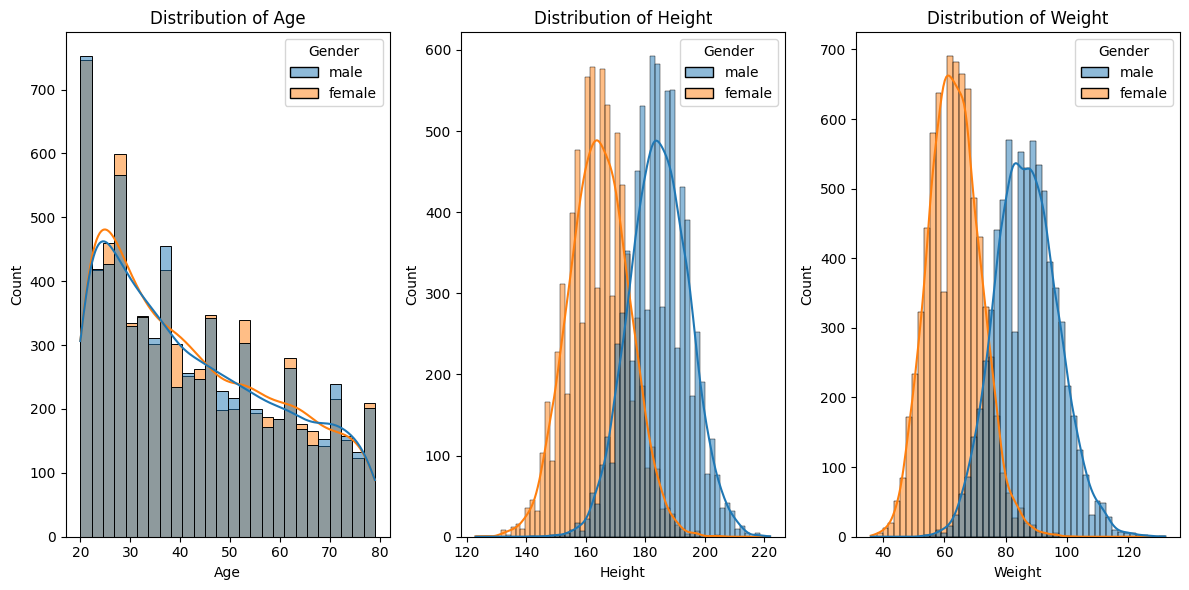

In [21]:
vars = ['Age', 'Height', 'Weight']

nrows = 1               #helps represent all plots on the same page
ncols = 3

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))
axs = axs.flatten()

for i, var in enumerate(vars):                                  # loop for all variables
    ax = axs[i]
    sns.histplot(x=var, data=df, hue='Gender', kde=True, ax=ax)
    ax.set_title(f'Distribution of {var}')

plt.tight_layout()
plt.show()

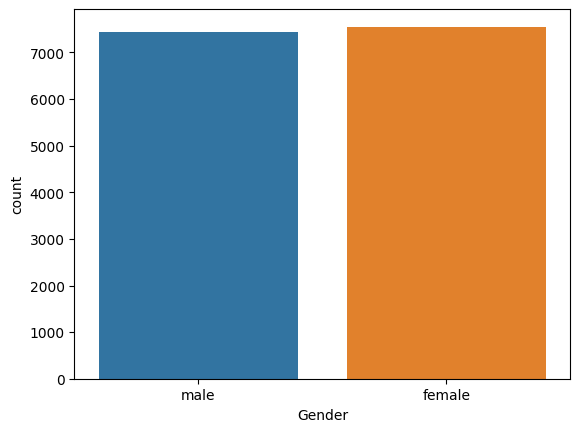

In [23]:
sns.countplot(x=df.Gender)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


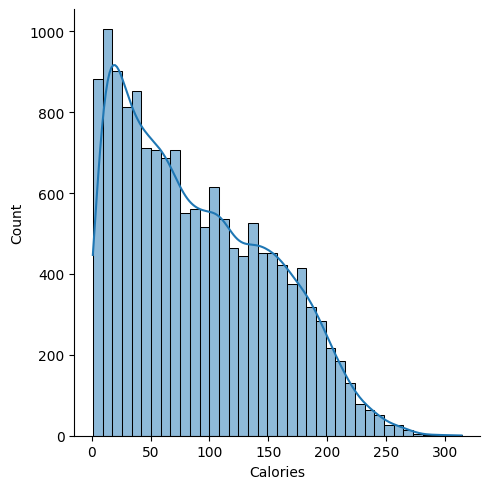

In [26]:
sns.displot(x=df.Calories, kde=True)
plt.show()

In [57]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#### Converting the values of the gender column into numeric column

In [30]:
le = LabelEncoder()
df.Gender = le.fit_transform(df.Gender)

In [31]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


#### Determining correlations among variables

In [41]:
cm = df.corr()
cm

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
User_ID,1.000000,-0.000687,-0.001827,-0.013520,-0.011603,-0.002751,-0.000457,0.000923,-0.001661
Gender,-0.000687,1.000000,0.003222,0.710534,0.783186,0.003440,0.011555,0.007264,0.022357
Age,-0.001827,0.003222,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,-0.013520,0.710534,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,-0.011603,0.783186,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,-0.002751,0.003440,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,-0.000457,0.011555,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.000923,0.007264,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,-0.001661,0.022357,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


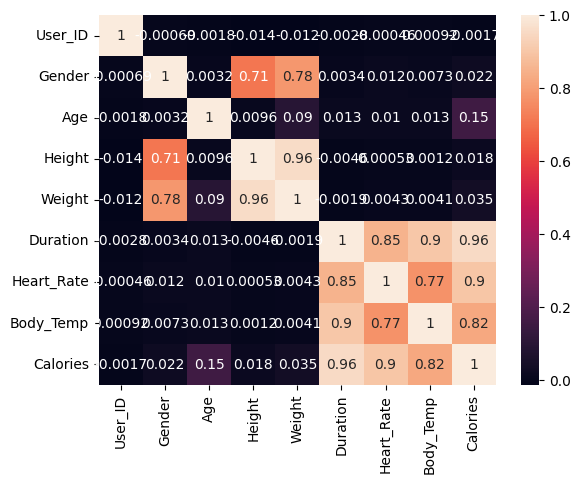

In [42]:
sns.heatmap(cm, annot=True)
plt.show()

#### Splitting the data into training data and testing data

In [43]:
X = df.drop('Calories', axis=1)
Y = df['Calories']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [44]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(12000, 8)
(12000,)
(3000, 8)
(3000,)


## Model Training and Evaluation

In [68]:
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error

### XGBRegressor

In [76]:
model1 = XGBRegressor()
model1.fit(X_train, Y_train)
test_data_prediction = model1.predict(X_test)
mae = mean_absolute_error(Y_test, test_data_prediction)
print("Mean Absolute Error = ", mae)
mse = mean_squared_error(Y_test, test_data_prediction)
print("Mean Squared Error = ", mse)

Mean Absolute Error =  1.5374335261185963
Mean Squared Error =  4.882887281803026


### Linear Regression

In [77]:
model2 = LinearRegression()
model2.fit(X_train, Y_train)
test_data_prediction = model2.predict(X_test)
mae = mean_absolute_error(Y_test, test_data_prediction)
print("Mean Absolute Error = ", mae)
mse = mean_squared_error(Y_test, test_data_prediction)
print("Mean Squared Error = ", mse)

Mean Absolute Error =  8.44371632207663
Mean Squared Error =  132.0675823406652


### SVR

In [78]:
model3 = SVR()
model3.fit(X_train, Y_train)        
test_data_prediction = model3.predict(X_test)
mae = mean_absolute_error(Y_test, test_data_prediction)
print("Mean Absolute Error = ", mae)
mse = mean_squared_error(Y_test, test_data_prediction)
print("Mean Squared Error = ", mse)

Mean Absolute Error =  53.81979973832611
Mean Squared Error =  4216.562264240496


XGBRegressor proved to be the best model among the three. Now that the model is trained and evaluated let us make a predictive system using the same.

In [79]:
#Making a predictive system

inputs_list = [11179863,1,69,179.0,79.0,5.0,88.0,38.7]
inputs = np.asarray(inputs_list)     #converting input to array
inputs = inputs.reshape(1,-1)
result = model1.predict(inputs)
print(f"Predicted Calories Burnt: {result[0]}")

Predicted Calories Burnt: 25.971498489379883
